In [1]:
import numpy as np
import xarray as xr; xr.set_options(display_style='html', keep_attrs=True)
import matplotlib as mpl
import matplotlib.pyplot as plt

import sys; sys.path.append("..")
from dataset_manipulation import *

In [2]:
fn_in='surfdata_1.9x2.5_hist_78pfts_CMIP6_simyr2000_c190304'
fn = '../../data/surfdatamap/'+fn_in + '.nc'
dset_in = xr.open_dataset(fn)
dset_in = convert_lsmcoord(dset_in)
dset_in = convert360_180(dset_in)
lnd_frac=dset_in.LANDFRAC_PFT
pfts2000_noedit = dset_in.PCT_NAT_PFT

In [3]:
fn = '../../processed-data/input/IDEALIZED/surfdata_1.9x2.5_hist_78pfts_CMIP6_simyr2000_c190304_edited.nc'
dset_in = xr.open_dataset(fn)
dset_in = convert_lsmcoord(dset_in)
dset_in = convert360_180(dset_in)
pfts2000_edit = dset_in.PCT_NAT_PFT

In [2]:
casename = 'IDEAL-ON_2000_f19_f19'
raw_path = '../../../archive/'

In [4]:
comp = 'lnd'; model='clm2'
fp = raw_path+casename+'/'+comp+'/hist/'+casename+'.'+model+'.h0.2012-12.nc' #last file
ds = xr.open_dataset(fp)
ds = convert360_180(ds)
pfts2012 = ds.PCT_NAT_PFT#.isel(time=-1)

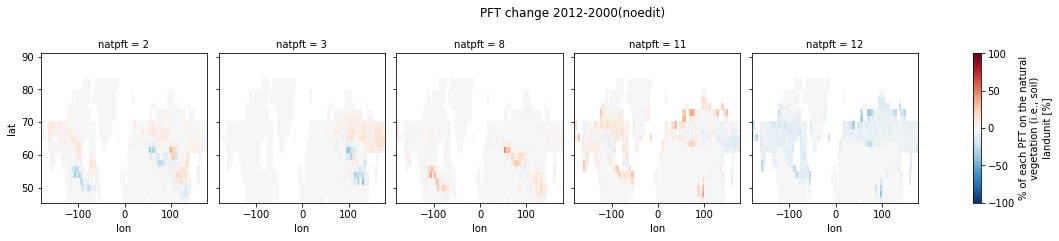

max ∆: 45.89322960243228


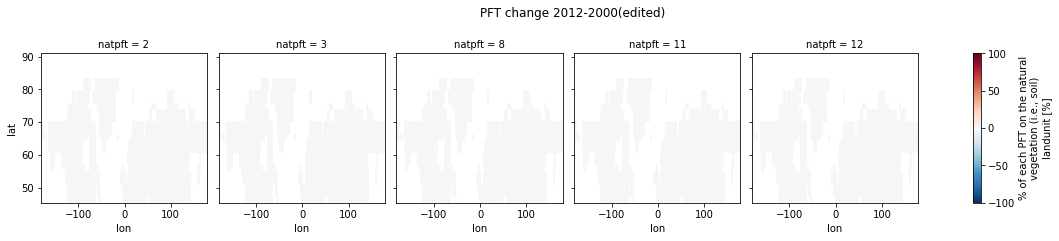

max ∆: 4.035882739117369e-12


In [5]:
pfts20122 = pfts2012.interp_like(pfts2000_noedit)
diff = (pfts20122-pfts2000_noedit)
diff.sel(natpft=[2,3,8,11,12]).where(pfts20122.lat>45., drop=True).plot(col='natpft', col_wrap=5, vmax=100); 
plt.suptitle('PFT change 2012-2000(noedit)', y=1.1); plt.show()
print('max ∆:', diff.max().values)

pfts20122 = pfts2012.interp_like(pfts2000_edit)
diff = (pfts20122-pfts2000_edit)
diff.sel(natpft=[2,3,8,11,12]).where(pfts20122.lat>45., drop=True).plot(col='natpft', col_wrap=5, vmax=100); 
plt.suptitle('PFT change 2012-2000(edited)', y=1.1); plt.show()
print('max ∆:', diff.max().values)

In [3]:
ds_i = create_dataset(raw_path, casename, 'atm', full_dset = True)
ds_i = convert360_180(ds_i)
processed_path = '../../processed-data/output/'
variables = ['LANDFRAC', 'GRIDAREA','SFisoprene','SFmonoterp']
ds_i[variables].to_netcdf(processed_path+'ds_IDEAL.nc')

ds_c = create_dataset(raw_path, 'CTRL_2000_f19_f19', 'atm', full_dset = True)
ds_c = convert360_180(ds_c)
ds_c[variables].to_netcdf(processed_path+'ds_CTRL.nc')

Files found
Dataset created
Postprocessing completed


/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/xarray/core/indexing.py:1369: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/xarray/core/indexing.py:1369: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


Files found
Dataset created
Postprocessing completed


/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/xarray/core/indexing.py:1369: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/xarray/core/indexing.py:1369: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


In [7]:
ds_i

<xarray.Dataset>
Dimensions:           (ilev: 33, lat: 96, lev: 32, lon: 144, nbnd: 2, time: 60)
Coordinates:
  * lat               (lat) float64 -90.0 -88.11 -86.21 ... 86.21 88.11 90.0
  * lon               (lon) float64 -180.0 -177.5 -175.0 ... 172.5 175.0 177.5
  * lev               (lev) float64 3.643 7.595 14.36 ... 957.5 976.3 992.6
  * ilev              (ilev) float64 2.255 5.032 10.16 ... 967.5 985.1 1e+03
  * time              (time) datetime64[ns] 2008-01-15 2008-02-15 ... 2012-12-15
Dimensions without coordinates: nbnd
Data variables:
    LANDFRAC          (time, lat, lon) float32 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    GRIDAREA          (time, lat, lon) float32 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    gw                (time, lat) float64 dask.array<chunksize=(1, 96), meta=np.ndarray>
    date              (time) int32 dask.array<chunksize=(1,), meta=np.ndarray>
    time_bnds         (time, nbnd) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    SFisoprene        (time, lat, lon) float32 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    SFmonoterp        (time, lat, lon) float32 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    N_AER             (time, lev, lat, lon) float32 dask.array<chunksize=(1, 32, 96, 144), meta=np.ndarray>
    DOD550            (time, lat, lon) float32 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    SOA_A1            (time, lev, lat, lon) float32 dask.array<chunksize=(1, 32, 96, 144), meta=np.ndarray>
    SOA_NA            (time, lev, lat, lon) float32 dask.array<chunksize=(1, 32, 96, 144), meta=np.ndarray>
    cb_SOA_A1         (time, lat, lon) float32 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    cb_SOA_NA         (time, lat, lon) float32 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    cb_SOA_A1_OCW     (time, lat, lon) float32 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    cb_SOA_NA_OCW     (time, lat, lon) float32 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    ACTNL             (time, lat, lon) float32 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    ACTREL            (time, lat, lon) float32 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    CDNUMC            (time, lat, lon) float32 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    CLDHGH            (time, lat, lon) float32 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    CLDLOW            (time, lat, lon) float32 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    CLDMED            (time, lat, lon) float32 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    CLDTOT            (time, lat, lon) float32 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    CLDLIQ            (time, lev, lat, lon) float32 dask.array<chunksize=(1, 32, 96, 144), meta=np.ndarray>
    CLOUD             (time, lev, lat, lon) float32 dask.array<chunksize=(1, 32, 96, 144), meta=np.ndarray>
    CLOUDCOVER_CLUBB  (time, ilev, lat, lon) float32 dask.array<chunksize=(1, 33, 96, 144), meta=np.ndarray>
    FCTL              (time, lat, lon) float32 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    NUMLIQ            (time, lev, lat, lon) float32 dask.array<chunksize=(1, 32, 96, 144), meta=np.ndarray>
    TGCLDLWP          (time, lat, lon) float32 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    FLNT              (time, lat, lon) float32 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    FSNT              (time, lat, lon) float32 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    FLNT_DRF          (time, lat, lon) float32 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    FLNTCDRF          (time, lat, lon) float32 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    FSNTCDRF          (time, lat, lon) float32 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    FSNT_DRF          (time, lat, lon) float32 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    LWCF              (time, lat, lon) float32 das

In [4]:
variables = ['FSDS','FSNS']
ds_i[variables].to_netcdf(processed_path+'ds_IDEAL_abedo.nc')
ds_c[variables].to_netcdf(processed_path+'ds_CTRL_abedo.nc')

In [48]:
ds_ideal = xr.open_dataset(processed_path+'ds_IDEAL.nc')
ds_ctrl = xr.open_dataset(processed_path+'ds_CTRL.nc')
lndfrac= ds.LANDFRAC.isel(time=0).drop('time')

In [50]:
iso_ideal = ds_ideal.SFmonoterp.where(lndfrac>0.)
iso_ctrl = ds_ctrl.SFmonoterp.where(lndfrac>0.)

In [51]:
def plot_trend(ds):
    ds.where(ds.lat>45., drop=True).mean(['lat','lon']).plot()
    ds.where(ds.lat>45., drop=True).mean(['lat','lon']).chunk({'time': None}).rolling(time=12).mean().plot()

    out = ds.polyfit(dim='time', deg=1, full=True)
    polyfit = xr.polyval(coord=ds['time'], coeffs=out.polyfit_coefficients)
    polyfit.where(ds.lat>45., drop=True).mean('lat').mean('lon').plot()

        
def plot_trend2(ds, ds2):
    ds.where(ds.lat>45., drop=True).mean(['lat','lon']).plot()
    ds.where(ds.lat>45., drop=True).mean(['lat','lon']).chunk({'time': None}).rolling(time=12).mean().plot()

    out = ds.polyfit(dim='time', deg=1, full=True)
    polyfit = xr.polyval(coord=ds['time'], coeffs=out.polyfit_coefficients)
    polyfit.where(ds.lat>45., drop=True).mean('lat').mean('lon').plot()

    ds2.where(ds.lat>45., drop=True).mean(['lat','lon']).plot()
    ds2.where(ds.lat>45., drop=True).mean(['lat','lon']).chunk({'time': None}).rolling(time=12).mean().plot()

    out = ds2.polyfit(dim='time', deg=1, full=True)
    polyfit = xr.polyval(coord=ds2['time'], coeffs=out.polyfit_coefficients)
    polyfit.where(ds2.lat>45., drop=True).mean('lat').mean('lon').plot()
    
    
def plot_map_trend(ds):
    coeff = ds.polyfit(dim='time', deg=1, full=True).polyfit_coefficients.sel(degree=1)
    coeff.where(lndfrac>0.).where(ds.lat >45., drop=True).plot()

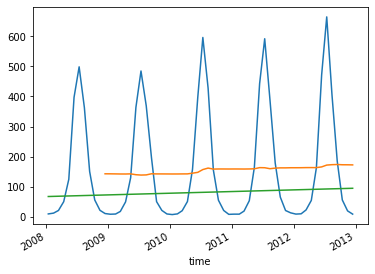

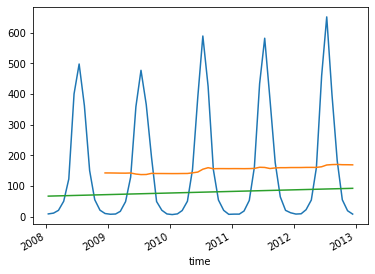

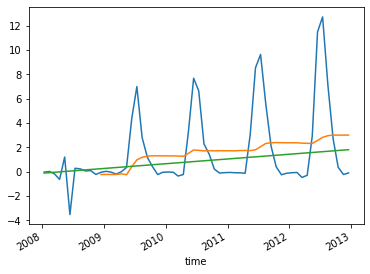

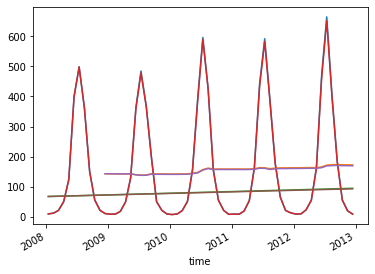

In [52]:
#plot_trend(iso_ctrl)
#iso_ctrl.where(iso_ctrl.lat>45., drop=True).mean(['lat','lon']).where(iso_ctrl['time.month']==7, drop=True).plot()
#plt.show()
plot_trend(iso_ideal*1e+6*(60*60*24*365)); plt.show()
plot_trend(iso_ctrl*1e+6*(60*60*24*365)); plt.show()
plot_trend((iso_ideal-iso_ctrl)*1e+6*(60*60*24*365)); plt.show()
plot_trend2(iso_ideal*1e+6*(60*60*24*365), iso_ctrl*1e+6*(60*60*24*365)); plt.show()

In [53]:
((iso_ideal.where(ds_ideal.lat>45., drop=True).sum()-iso_ctrl.where(ds_ctrl.lat>45., drop=True).sum())/iso_ctrl.where(ds_ctrl.lat>45., drop=True).sum()*100).values

array(1.0650935, dtype=float32)

In [ ]:
iso_ideal.sum().values

In [ ]:
iso_ctrl.sum().values

In [ ]:
plot_map_trend(iso_ideal-iso_ctrl)

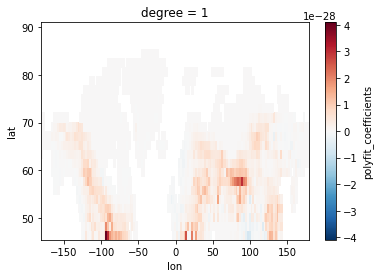

In [26]:
plot_map_trend(iso_ctrl)